<a href="https://colab.research.google.com/github/parth721/Computer-vision-deep-fake-detection/blob/main/objectDetectionYoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
!pip install roboflow
!pip install clearml
!pip install fastapi
!pip install kaleido
!pip install uvicorn
!pip install python-multipart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you 

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key='Xs8pBrijGLVYgyRP0VXb')
project = rf.workspace('-mye82').project('city-problem')
dataset = project.version(4).download('yolov8')

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.231, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to city-problem-4 in yolov8:: 100%|██████████| 2770/2770 [00:00<00:00, 3887.91it/s]


In [ ]:
#why this exclamatory mark works but without it the code giving syntax-error ?
!yolo  task = detect mode = train model=yolov8m.pt  data = {dataset.location}/data.yaml epochs = 100  imgsz = 640

100% 49.7M/49.7M [00:00<00:00, 152MB/s]
Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/city-problem-4/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

In [ ]:
!yolo task=detect \
mode = val \
model={HOME}/runs/detect/train/weights/best.pt \
data = {dataset.location}/data.yaml

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 423, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 94, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 146, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 639, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 578, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened

In [ ]:
!yolo task=detect \
mode = predict \
model = {HOME}/runs/detect/train/weights/best.pt \
conf = 0.25 \
source = {dataset.location}/test/images

pretrained one :

In [ ]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 243MB/s]


In [ ]:
result = model.predict("test.webp")


image 1/1 /content/test.webp: 416x640 1 dog, 1 horse, 1082.4ms
Speed: 17.5ms preprocess, 1082.4ms inference, 31.4ms postprocess per image at shape (1, 3, 416, 640)


In [ ]:
results = result[0]

In [ ]:
print(len(results.boxes))

2


In [ ]:
for box in results.boxes:
    label = results.names[box.cls[0].item()]
    cords = [round(x) for x in box.xyxy[0].tolist()]
    prob = box.conf[0].item()
    print("Object type : ", label)
    print("Probability : ", prob)
    print(" === ")

Object type :  horse
Probability :  0.9529832005500793
 === 
Object type :  dog
Probability :  0.9512521028518677
 === 


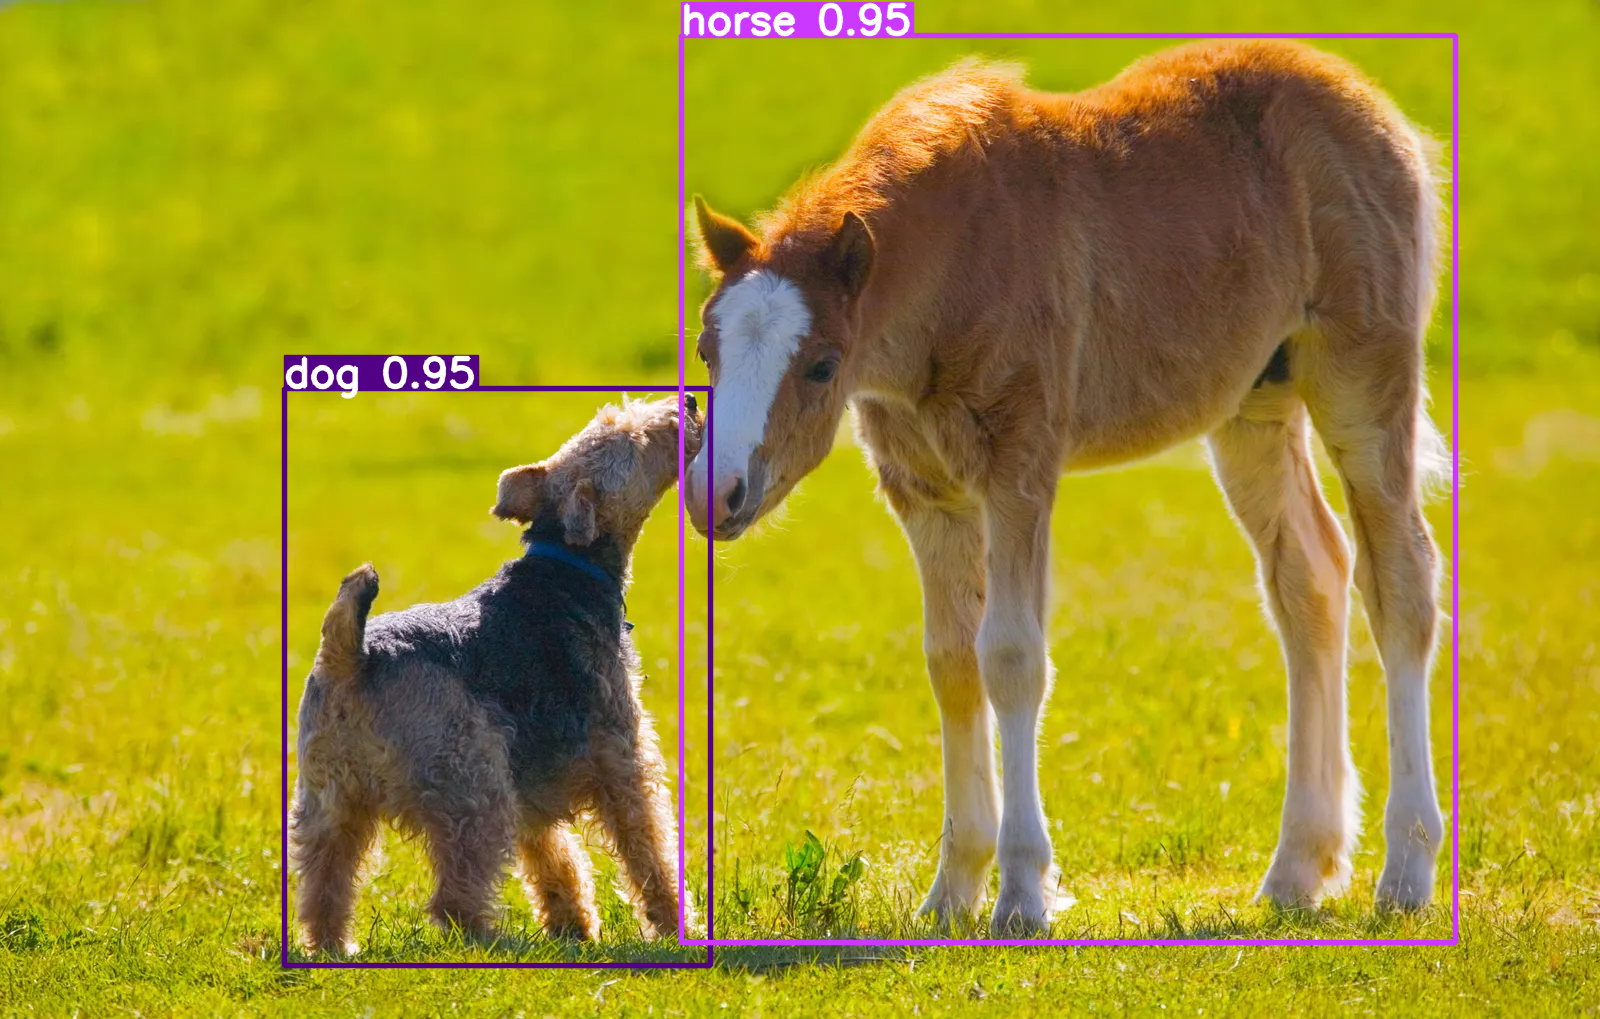

In [ ]:
from PIL import Image
Image.fromarray(results.plot()[:,:,::-1])

# **Image Segmentation**

In [ ]:


!mkdir {HOME}/dataset
%cd {HOME}/dataset

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
dataset = project.version(5).download("yolov8")

%cd {HOME}
!yolo task=segment mode=train model=yolov8s-seg.pt data={HOME}/Downloads/floodv.7i.yolov8/data.yaml epochs=25 imgz=640!ls {HOME}/runs/segment/train/

mkdir: cannot create directory ‘{HOME}/dataset’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/dataset'
/content
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=undefined&ref=undefined
loading Roboflow workspace...


KeyError: ignored